## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз"яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [55]:
bank_dataset = pd.read_csv("../bank-additional-full.csv", sep=";", encoding="utf-8")

In [56]:
bank_dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [57]:
bank_dataset.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [58]:
bank_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [59]:
bank_dataset.shape

(41188, 21)

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [60]:
bank_target = bank_dataset[["y"]]
bank_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       41188 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


In [61]:
bank_target["y"] = LabelEncoder().fit_transform(bank_target)
bank_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       41188 non-null  int32
dtypes: int32(1)
memory usage: 161.0 KB


In [62]:
bank_target.head()

,y
0,0
1,0
2,0
3,0
4,0


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [63]:
bank_client = bank_dataset[
    ["age", "job", "marital", "education", "default", "housing", "loan"]
]

In [64]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [65]:
for i in bank_client:
    print(f"{i.capitalize()}: ")
    print(sorted(bank_client[i].unique()), end="\n\n")

Age: 
[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 94, 95, 98]

Job: 
['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']

Marital: 
['divorced', 'married', 'single', 'unknown']

Education: 
['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']

Default: 
['no', 'unknown', 'yes']

Housing: 
['no', 'unknown', 'yes']

Loan: 
['no', 'unknown', 'yes']



**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

In [66]:
print(f"Client max age: {bank_client['age'].max()} \nClient min age: {bank_client['age'].min()}")

Client max age: 98 
Client min age: 17


In [67]:
print(f"Age NaN count: {bank_client['age'].isna().sum()}")

Age NaN count: 0


<Axes: xlabel='age', ylabel='count'>

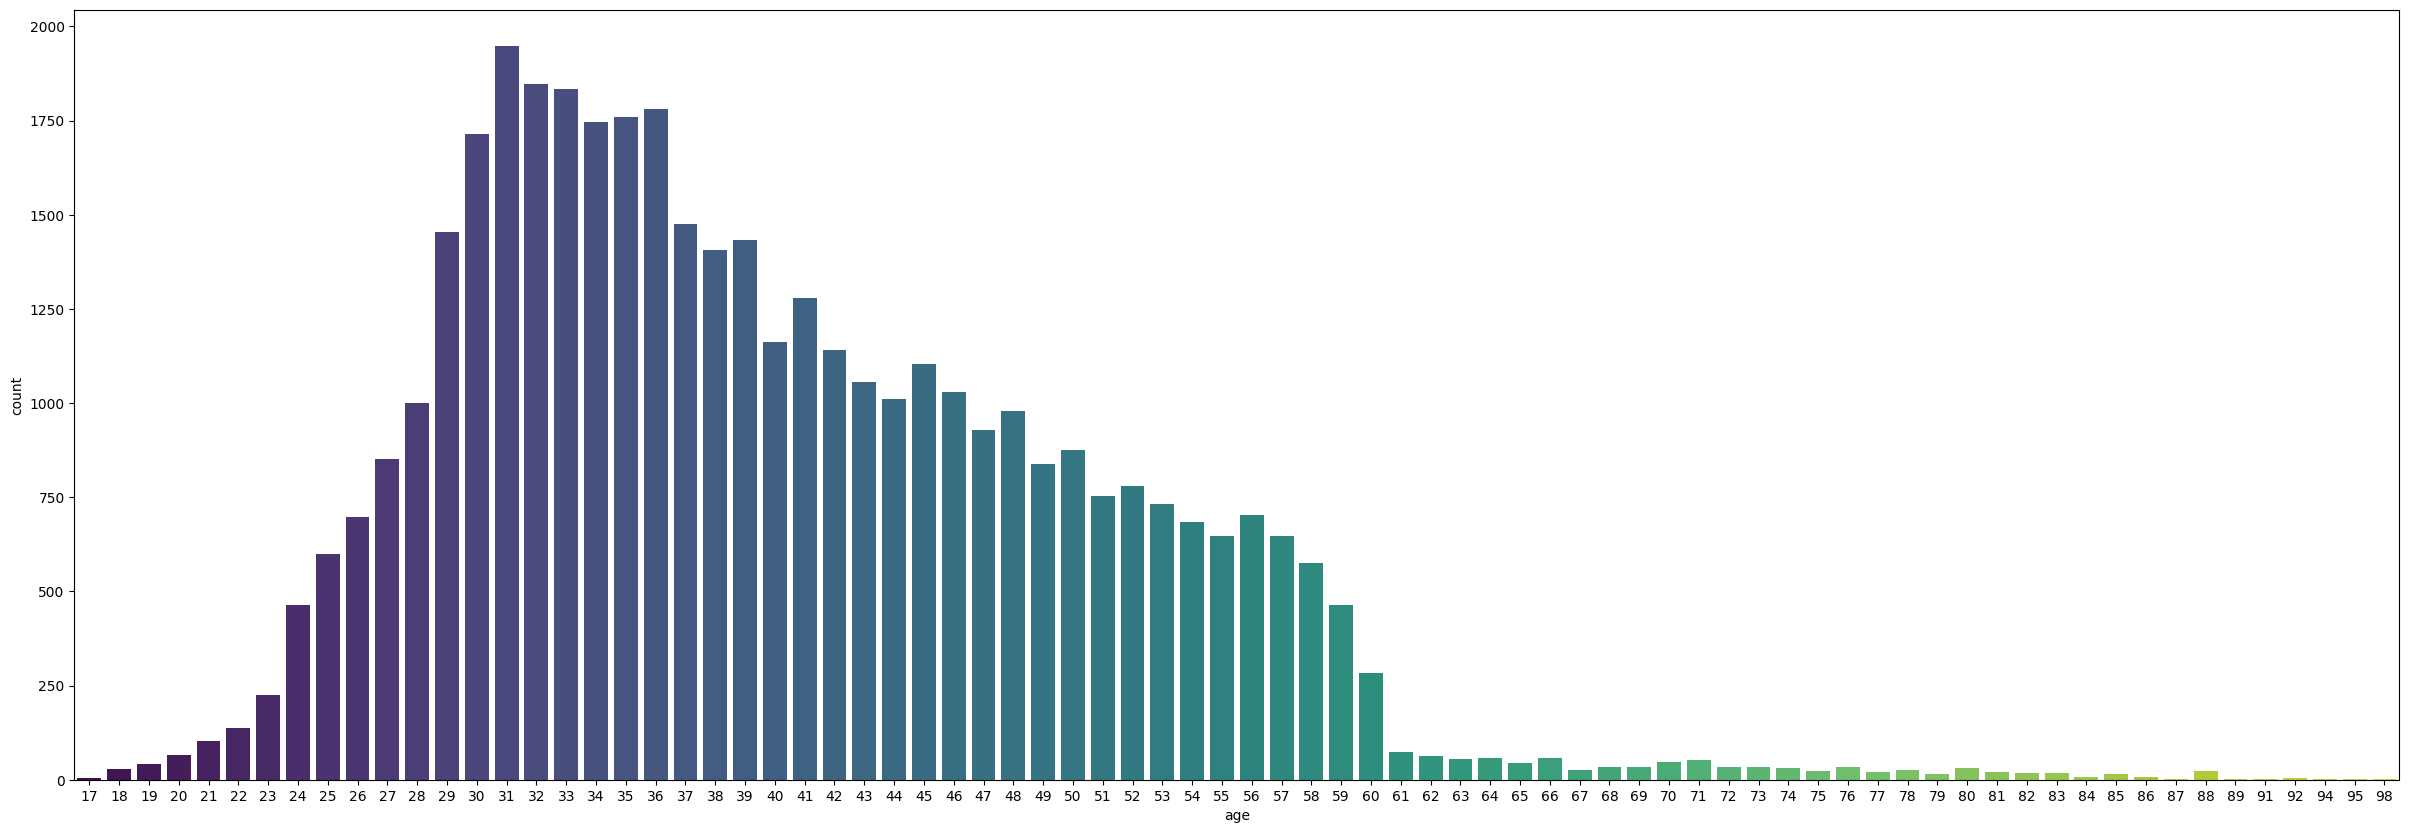

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))
sns.countplot(
    bank_client,
    x=bank_client["age"],
    ax=ax,
    palette="viridis",
)

<Axes: xlabel='age', ylabel='Count'>

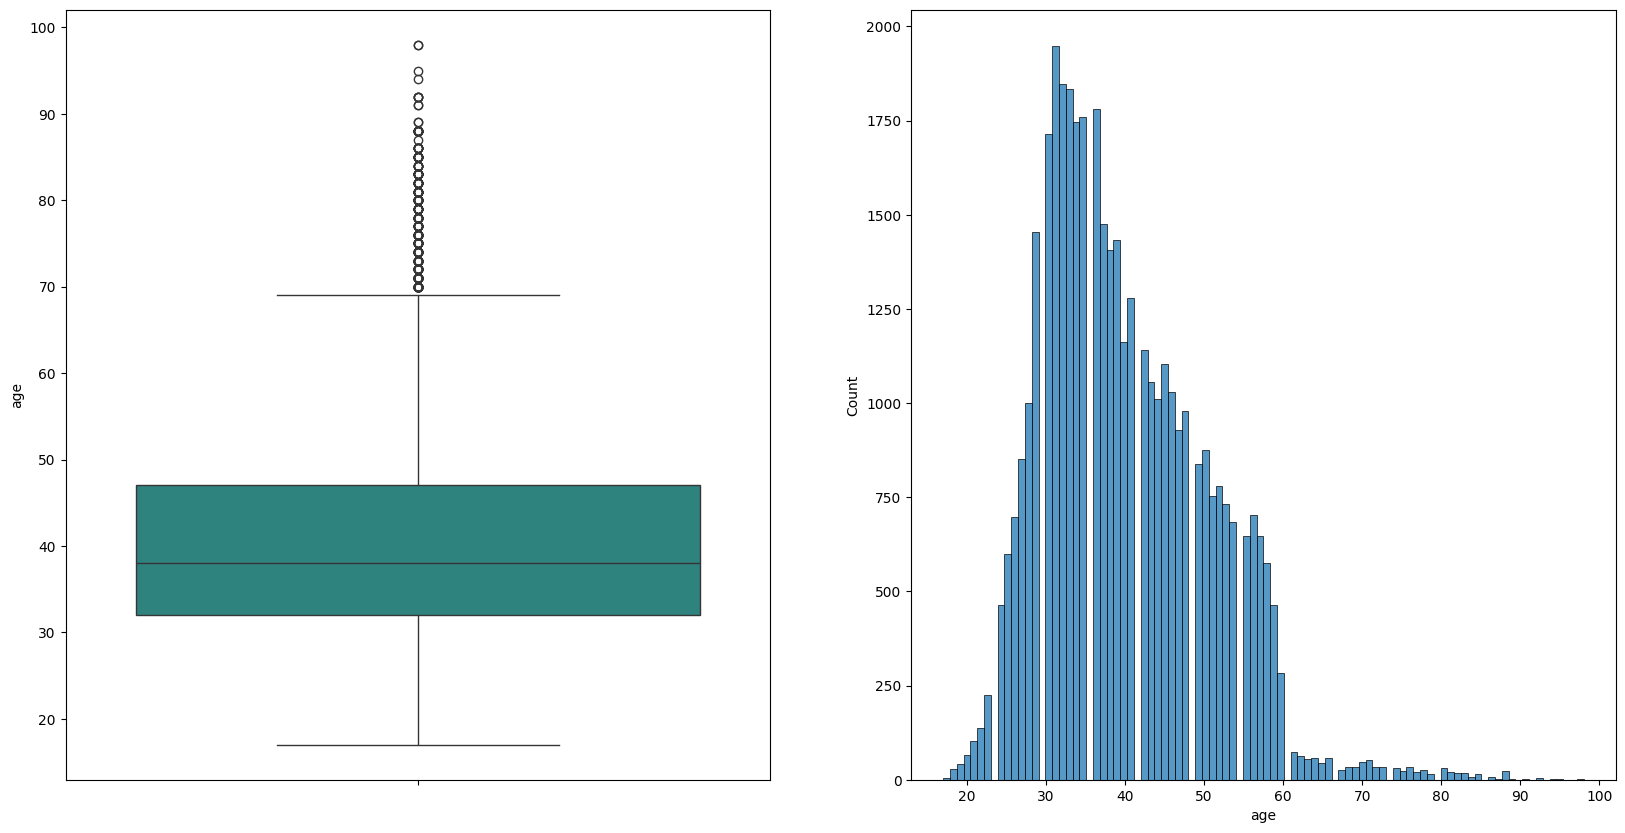

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(
    bank_dataset,
    y="age",
    ax=ax[0],
    palette="viridis"
)

sns.histplot(
    bank_dataset.drop("y", axis=1), 
    x=bank_dataset["age"], 
    ax=ax[1],
    palette="viridis"
)

In [70]:
bank_dataset["age"].skew()

0.7846968157646645

**Висновки з 1-4 завдання (детальні)**

1. Датасет має розмір `(41188, 21)` та згідно `bank_dataset.isna().sum()` не містить пропущених значень.

2. Колонка `y` є цільовою змінною яка має 2 стани `yes` та `no` і означає чи оформлено депозит.

3. Клієнта характеризують змінні `"age", "job", "marital", "education", "default", "housing", "loan"`

4. Максимальний вік клієнта дорівнює 98 а мінімальний 17. \
У колонці `age` пропусків немає. \
По графіку розподілу можна побачити що він має важкий правий хвіст (про що також свідчить результат функції `.skew()` який дорівнює `0.7846968157646645`) та частково схожий на нормальний розподіл.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [71]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q2 = bank_dataset[column].median()
    Q3 = np.percentile(sorted_data, high_percentile)

    print(f"Q1 {low_percentile} percentile of the given data: {Q1}", end="\n\n")
    print(f"Q2 percentile: {Q2}", end="\n\n")
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}", end="\n\n")
    print("----------------------------------------------------------")

    IQR = Q3 - Q1
    print("")
    print(f"Interquantile range: {IQR}")
    print("")
    print("----------------------------------------------------------")
    low_lim = Q1 - (IQR * 1.5)
    up_lim = Q3 + (IQR * 1.5)
    print("")
    print(f" Lower bound: {low_lim}")
    print("")
    print(f" Upper bound: {up_lim}")
    print("")
    print("----------------------------------------------------------")
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print("")
    print(f"Outliers in the dataset:")
    display(outliers)


    return outliers

In [72]:
outliers = detect_outliers_with_interquantile_range(bank_client, "age", 10, 90)

Q1 10 percentile of the given data: 28.0

Q2 percentile: 38.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

В цьому завданні нам потрібно було визначити нижню `low_lim` та верхню `up_lim` межі поза яких всі значення будуть вважатись вкидами. \
Це ми визначили за допомогою формул `Q1 - 1.5 * IQR` для нижньої та `Q1 - 1.5 * IQR` для верхньої меж де `IQR` це розмаж між квартилями `Q1` та `Q3`. \
Ми отримали межі `(-12.5; 95.5)` під які підпадають лише 2 рядки у яких вік дорівнює 98 що є більше межі.

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

<Axes: xlabel='job', ylabel='Count'>

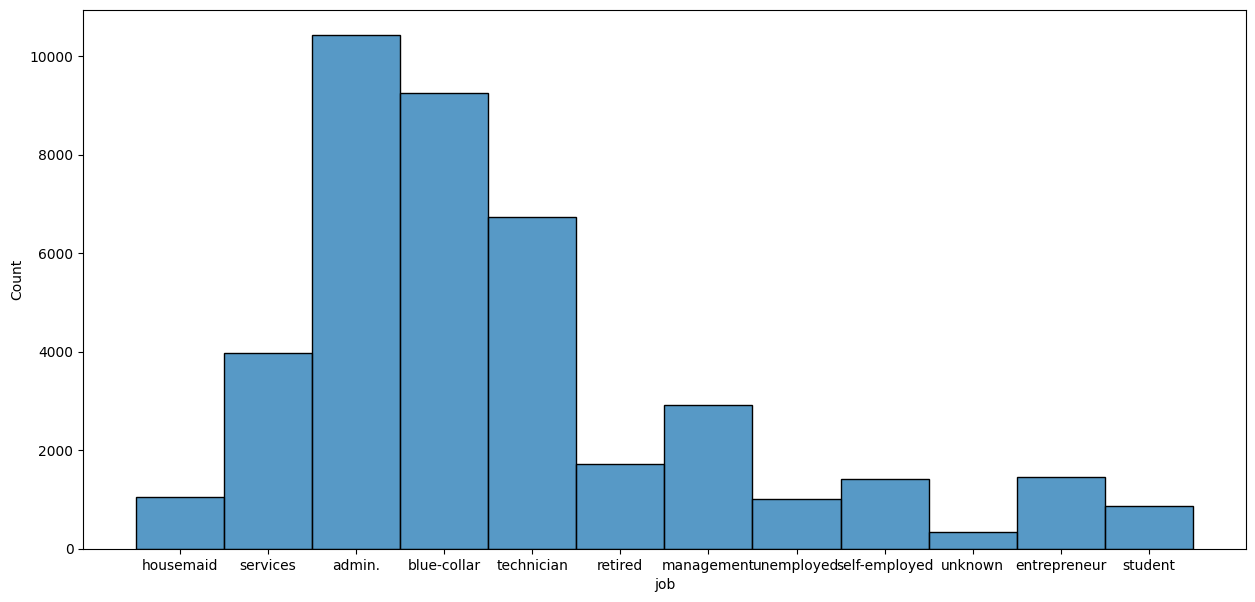

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

sns.histplot(
    bank_dataset, 
    x=bank_dataset["job"], 
    ax=ax,
    palette="viridis"
)

<Axes: xlabel='marital', ylabel='Count'>

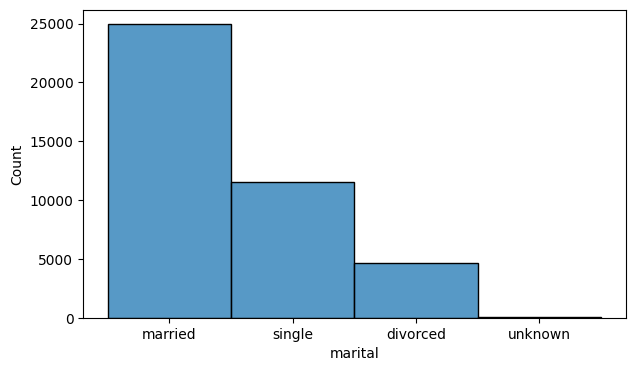

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
sns.histplot(
    bank_dataset, 
    x=bank_dataset["marital"], 
    ax=ax,
    palette="viridis"
)

<Axes: xlabel='education', ylabel='Count'>

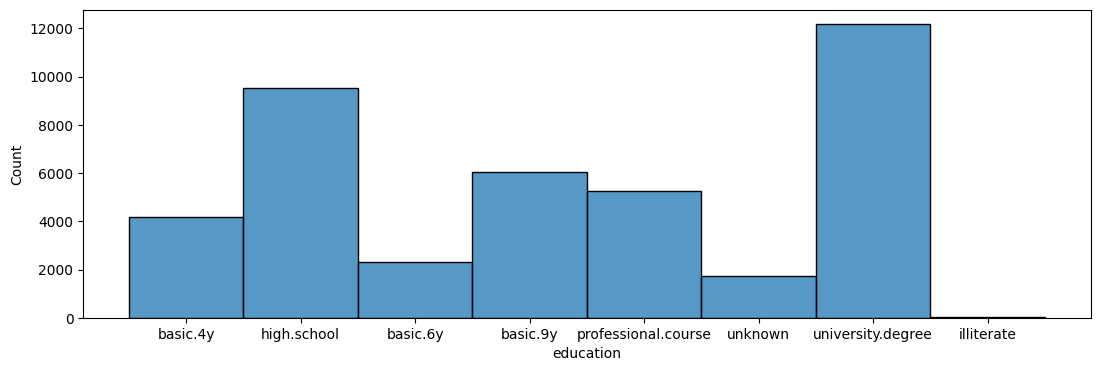

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(13, 4))

sns.histplot(
    bank_dataset, 
    x=bank_dataset["education"], 
    ax=ax,
    palette="viridis"
)

**Висновки з завдання 6 (детальні)**

1. Колонка `Job` це робота клієнта банку де модою є `admin`
2. Колонка `Marital` це сімейний стан клієнта банку де модою є `married` це означає що більшість клієнтів одружені
3. Колонка `Education` це освіта клієнта банку де модою є `university.degree` це означає що більшість клієнтів мають вищу освіту

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

<Axes: xlabel='default', ylabel='Count'>

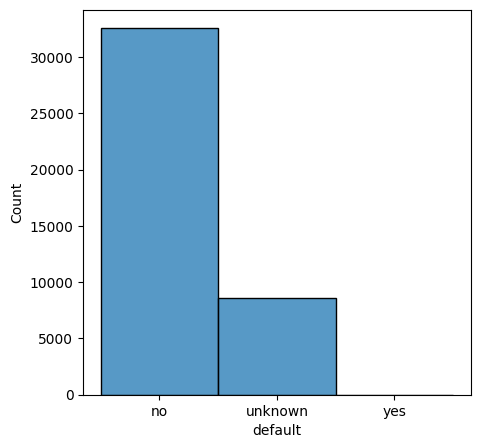

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.histplot(
    bank_dataset, 
    x=bank_dataset["default"], 
    ax=ax,
    palette="viridis"
)

<Axes: xlabel='housing', ylabel='Count'>

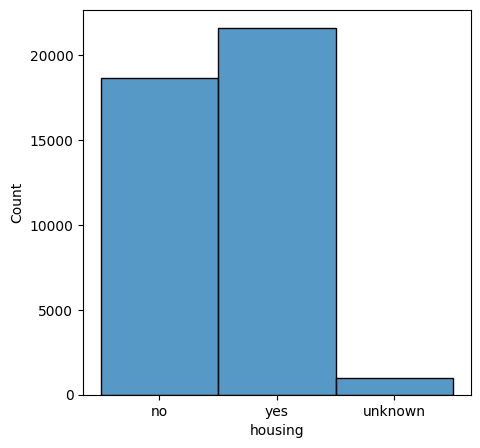

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.histplot(
    bank_dataset, 
    x=bank_dataset["housing"], 
    ax=ax,
    palette="viridis"
)

<Axes: xlabel='loan', ylabel='Count'>

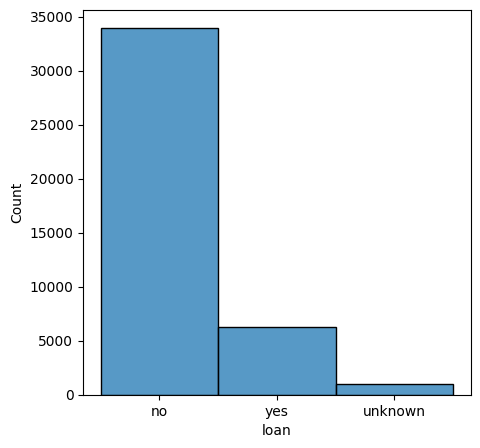

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.histplot(
    bank_dataset, 
    x=bank_dataset["loan"], 
    ax=ax,
    palette="viridis"
)

**Висновки з завдання 7 (детальні)**

1. Колонка `Default` визначає чи припиняв клієнт оплачувати кредит. модою є `no` це означає більшість клієнтів виплачували кредит згідно умов.
2. Колонка `Housing` визначає чи є у клієнта кредит на житло. модою є `yes` це означає що більшість клієнтів мають кредит на житло.
3. Колонка `Loan` визначає чи має клієнт загальний кредит. модою є `no`

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [79]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = le.fit_transform(not_null)
      
    return df

In [80]:
bank_client = encode_categorical_columns(bank_client, ["job", "marital", "education", "default", "housing", "loan"])

In [81]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2


In [82]:
bank_client.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [83]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
  """
  Function for encoding age column
    
  df: pd.DataFrame to encode
  age_col: age col to encode 
  """
  
  dataframe[age_col + "_bins"] = pd.qcut(dataframe[age_col], 4, labels=False)
          
  return dataframe

In [84]:
bank_client = encode_age(bank_client, "age")
bank_client["age_bins"].unique()

array([3, 1, 2, 0], dtype=int64)

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

Після перетворення в нашому датафреймі `bank_client` створилась колонка `age_bins` у якій ми записали вік у категоріальному форматі де кожна категорія `0, 1, 2, 3` відповідає проміжкам між квартилями \
0: (0; 25) \
1: (25; 50) \
2: (50; 75) \
3: (75; 100)

## Вибірка містить певну кількість атрибутів, які характеризують останій зв"язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв"язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [85]:
bank_relat = bank_dataset[
    ["contact","month","day_of_week","duration"]
]
bank_relat.isnull().sum()

contact        0
month          0
day_of_week    0
duration       0
dtype: int64

**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [86]:
for i in bank_relat.drop(columns="duration"):
    print(f"{i.capitalize()}: ")
    print(sorted(bank_relat[i].unique()), end="\n\n")

Contact: 
['cellular', 'telephone']

Month: 
['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']

Day_of_week: 
['fri', 'mon', 'thu', 'tue', 'wed']



# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



<Axes: xlabel='duration'>

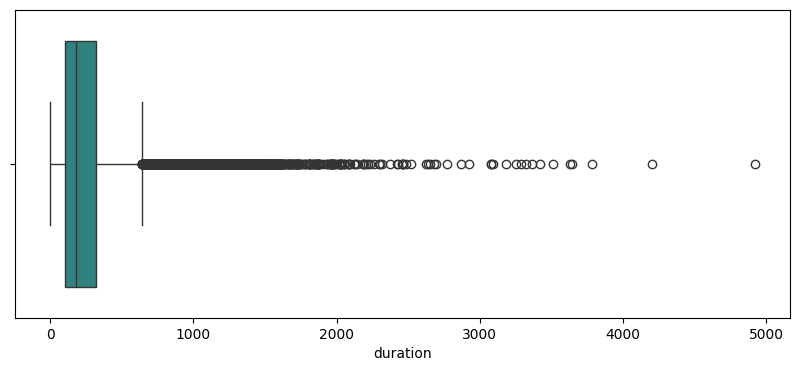

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

sns.boxplot(
    bank_relat, 
    x=bank_dataset["duration"], 
    ax=ax,
    palette="viridis"
)

<Axes: xlabel='duration', ylabel='Count'>

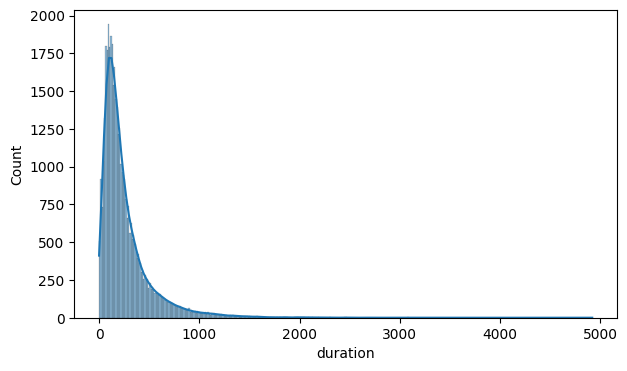

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

sns.histplot(
    bank_relat["duration"], 
    kde=True,
    ax=ax,
    palette="viridis"
)

In [89]:
bank_relat["duration"].skew()

3.263141255262832

**Висновки з завдання 12 (детальні)**

1. Загалом дзвінки тривали 900 секунд, найбільше значень розташовано від 0 до 400.

2. По графіку розподілу можна сказати що розподіл нагадує експоненційний та згідно графіку та функції `skew()` має важкий правий хвіст що свідчить про те що більшість значень розташовані ліворуч.

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [90]:
bank_relat = encode_categorical_columns(bank_relat, ["contact", "month", "day_of_week"])
bank_relat.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [91]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
  """
  Function for encoding duration column
    
  df: pd.DataFrame to encode
  duration_col: duration col to encode 
  """
  dataframe[duration_col + "_bins"] = pd.qcut(dataframe[duration_col], 4, labels=False)
          
  return dataframe

In [102]:
bank_relat = encode_duration(bank_relat, "duration")
bank_relat["duration_bins"].unique()

array([2, 1, 3, 0], dtype=int64)

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [93]:
bank_socec = bank_dataset[
    ["emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
]

**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [95]:
bank_other = bank_dataset[
    ["campaign", "pdays", "previous", "poutcome"]
]

**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [98]:
bank_other["poutcome"] = LabelEncoder().fit_transform(bank_other["poutcome"])
bank_other["poutcome"].unique()

array([1, 0, 2], dtype=int64)

## Будування моделей класифікації

**Завдання 18** З"єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [104]:
bank_final = pd.concat([bank_client, bank_relat, bank_socec, bank_other], axis=1)
bank_final = bank_final.drop(columns=["age", "duration"])

bank_final.head()


,job,marital,education,default,housing,loan,age_bins,contact,month,day_of_week,duration_bins,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,3,1,0,0,0,0,3,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,7,1,3,1,0,0,3,1,6,1,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,7,1,3,0,2,0,1,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,0,1,1,0,0,0,2,1,6,1,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,7,1,3,0,0,2,3,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1


Для датафрейму `bank_final` я дропнув колонки `age` та `duration` тому що ми перетворювали їх в категоріальні по квартильних проміжках

**Завдання 19** Провести ділення вибірки

In [105]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [106]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, bank_target, 0.2, 10, 101)

In [107]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [108]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [109]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = "accuracy").mean())

[[7109  170]
 [ 633  326]]
90.0


## k-NN

k=1 86.80 (+/- 0.40)
k=2 89.33 (+/- 0.49)
k=3 88.99 (+/- 0.44)
k=4 89.82 (+/- 0.49)
k=5 89.77 (+/- 0.70)
k=6 90.23 (+/- 0.57)
k=7 90.12 (+/- 0.64)
k=8 90.35 (+/- 0.55)
k=9 90.32 (+/- 0.70)
k=10 90.42 (+/- 0.56)
k=11 90.40 (+/- 0.66)
k=12 90.40 (+/- 0.57)
k=13 90.45 (+/- 0.65)
k=14 90.42 (+/- 0.63)
k=15 90.49 (+/- 0.66)
k=16 90.50 (+/- 0.66)
k=17 90.53 (+/- 0.64)
k=18 90.53 (+/- 0.64)
k=19 90.53 (+/- 0.67)
k=20 90.52 (+/- 0.63)
k=21 90.55 (+/- 0.70)
k=22 90.53 (+/- 0.61)
k=23 90.53 (+/- 0.66)
k=24 90.55 (+/- 0.63)
k=25 90.57 (+/- 0.61)
The optimal number of neighbors is 24 with 90.6%


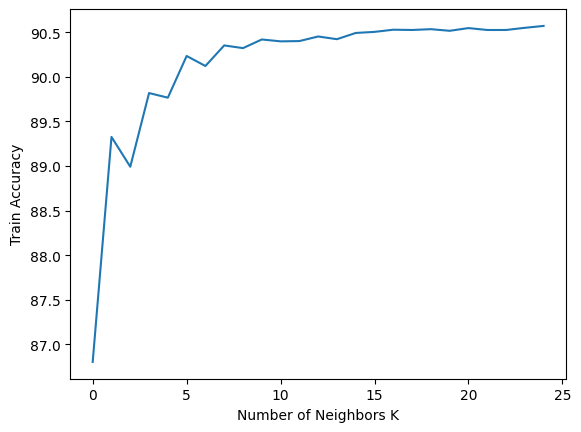

In [110]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights="uniform", p=2, metric="euclidean")
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring="accuracy")
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Train Accuracy")
plt.show()

In [111]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = "accuracy").mean())

[[7167  112]
 [ 708  251]]
90.0


## Логістична Регресія

In [112]:
models = pd.DataFrame({
                "Models": ["Логістична регресія", "Метод k-найближчих сусідів"],
                "Score":  [LOGCV, KNNCV]
                })

models.sort_values(by="Score", ascending=False)

,Models,Score
0,Логістична регресія,0.903620
1,Метод k-найближчих сусідів,0.899493


**Висновки по моделям (детальні)**

Для обох моделей у нас вийшла точність близко 90% що доволі високий показник але не завжди це означає що наша модель працює ідеально тому що має місце таке поняття як адаптація моделі до навчальних даних коли модель просто звикає до датасету але на реальних даних буде працювати не краще ніж підкидання монетки. \
Тому я думаю що потрібно проаналізувати додаткові показники для того щоб бути повністю впевненим в надійності моделей але переважно такий високий показник означає що модель не підходить і потрібно думати далі :)